<a href="https://colab.research.google.com/github/BettyBett/CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


#### Data Understanding

In [2]:
# Preview the data
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.shape

(418, 12)

From checking out the shape we see that the dataset has 418 rows and 12 columns

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the dataset, there are only three columns with null values and these are the fare, age and cabin column with 1, 86 and 327 null values respectively.

In [7]:
df.duplicated().sum()

0

The dataset does not have any duplicates

#### Data cleaning

In [9]:
# Drop columns that might not be quite useful
titn = df.drop(['Name','Cabin','SibSp','PassengerId','Ticket'], axis = 1)
titn

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,34.5,0,7.8292,Q
1,1,3,female,47.0,0,7.0000,S
2,0,2,male,62.0,0,9.6875,Q
3,0,3,male,27.0,0,8.6625,S
4,1,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,8.0500,S
414,1,1,female,39.0,0,108.9000,C
415,0,3,male,38.5,0,7.2500,S
416,0,3,male,NaN,0,8.0500,S


In [10]:
# Check the missing values in the age column
titn['Age'].isnull().sum()

86

In [11]:
# replace the missing values of age with the mean
mean = titn['Age'].mean()

titn['Ages'] = titn['Age'].fillna(mean)
titn = titn.drop('Age',axis=1)
titn['Fare'] = titn['Fare'].round(2)
titn

,Survived,Pclass,Sex,Parch,Fare,Embarked,Ages
0,0,3,male,0,7.83,Q,34.50000
1,1,3,female,0,7.00,S,47.00000
2,0,2,male,0,9.69,Q,62.00000
3,0,3,male,0,8.66,S,27.00000
4,1,3,female,1,12.29,S,22.00000
...,...,...,...,...,...,...,...
413,0,3,male,0,8.05,S,30.27259
414,1,1,female,0,108.90,C,39.00000
415,0,3,male,0,7.25,S,38.50000
416,0,3,male,0,8.05,S,30.27259


In [12]:
# remove the decimals in the age column
titn['Age'] = [int(age) for age in titn['Ages']]
titn = titn.drop(['Ages','Fare'], axis=1)

### Data Visualization

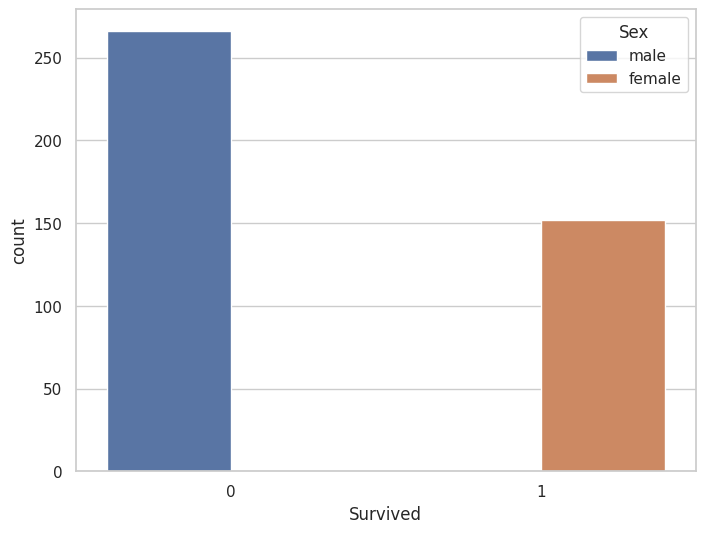

In [13]:
plt.figure(figsize = (8,6))

sns.set(style = 'whitegrid')
sns.countplot(data =titn, x ='Survived', hue ='Sex')

plt.show()

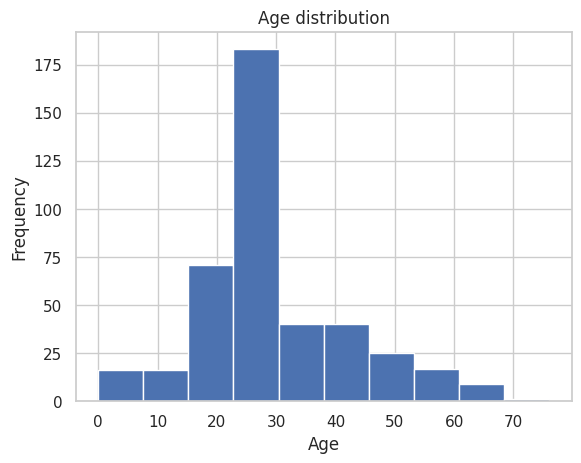

In [14]:
plt.hist(titn['Age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

### Converting categorical features

In [15]:
# convert the sex column to numerical
titn['Sex'].replace(['male','female'],[0,1],inplace=True)
titn['Embarked'].replace(['Q', 'S','C'],[0,1,2],inplace=True)

In [16]:
# Preview
titn.head()

,Survived,Pclass,Sex,Parch,Embarked,Age
0,0,3,0,0,0,34
1,1,3,1,0,1,47
2,0,2,0,0,0,62
3,0,3,0,0,1,27
4,1,3,1,1,1,22


In [17]:
# categorize age into 4 different categories
def category(age):
    if age < 18:
        return 0
    elif age < 36:
        return 1
    elif age < 54:
        return 2
    else:
        return 3

titn['Age'] = titn['Age'].apply(category)
titn

,Survived,Pclass,Sex,Parch,Embarked,Age
0,0,3,0,0,0,1
1,1,3,1,0,1,2
2,0,2,0,0,0,3
3,0,3,0,0,1,1
4,1,3,1,1,1,1
...,...,...,...,...,...,...
413,0,3,0,0,1,1
414,1,1,1,0,2,2
415,0,3,0,0,1,2
416,0,3,0,0,1,1


In [18]:
# confirm that all data types are integers
titn.dtypes

Survived    int64
Pclass      int64
Sex         int64
Parch       int64
Embarked    int64
Age         int64
dtype: object

### Modeling

In [19]:
X = titn.drop('Survived', axis=1)
y = titn['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((376, 5), (42, 5))

### Logistic Regression

In [22]:
# Build a logistic regression model
lm = LogisticRegression(penalty = 'l2', C= 0.015, solver='liblinear')
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy score is: {(accuracy * 100).round(2)}%")

The accuracy score is: 80.95%


In [23]:
cv_score = cross_val_score(lm, X_train, y_train, cv =5, scoring = 'accuracy')
cv_score

array([0.84210526, 0.86666667, 0.85333333, 0.81333333, 0.76      ])

### Decision Tree Classifier

In [33]:
# Create a decision tree classifier
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2,
                            min_samples_split = 3, max_features = 2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy score is: {(accuracy * 100).round(2)}%")

The accuracy score is: 92.86%


#### Results and conclusion

The logistic regression model accuracy is 80.95%, which means that the model does a very good job in predicting whether or not a passenger on the Titanic will survive.
In the logistic regression, increasing the value of c results in higher level of accuracy.
In the decision tree classifier, the accuracy is 92.86%. Thus the model does a good job in predicting whether or not a passenger on the Titanic will survive.